In [1]:
import os, sys
import numpy as np
import torch
from torch.utils.data import Dataset
from PIL import Image
import scipy.io
import pickle
import pytorch_lightning
from omegaconf import OmegaConf

cfg = OmegaConf.load(f'../configs/default.yaml')
cfg = OmegaConf.merge(cfg, OmegaConf.load(f'../configs/fc4.yaml'))


In [2]:
import importlib
import colorchecker
importlib.reload(colorchecker)

phase = 'train'
folds_num = 1

loader = colorchecker.get_loader(cfg, phase, folds_num)

In [5]:
sample = None
for i, batch in enumerate(loader):
    img, illum, fn = batch
    print("Batch index:", i)
    print("Image shape:", img.shape)
    print("Illuminant:", illum)
    print("File name:", fn)
    sample = img[0]


    if i >= 2:
        break

Batch index: 0
Image shape: torch.Size([10, 3, 512, 512])
Illuminant: tensor([[0.3989, 0.7882, 0.4686],
        [0.4427, 0.7191, 0.5356],
        [0.3952, 0.7647, 0.5089],
        [0.3283, 0.7399, 0.5871],
        [0.3330, 0.7558, 0.5638],
        [0.5250, 0.8137, 0.2494],
        [0.4392, 0.7675, 0.4669],
        [0.3591, 0.7561, 0.5471],
        [0.5584, 0.7792, 0.2845],
        [0.3699, 0.7588, 0.5361]])
File name: ['IMG_0687.png', '8D5U5597.png', 'IMG_0444.png', 'IMG_0805.png', 'IMG_0490.png', 'IMG_0626.png', 'IMG_0410.png', 'IMG_0307.png', 'IMG_0604.png', 'IMG_0390.png']
Batch index: 1
Image shape: torch.Size([10, 3, 512, 512])
Illuminant: tensor([[0.5406, 0.7250, 0.4268],
        [0.3372, 0.7425, 0.5788],
        [0.5203, 0.7816, 0.3439],
        [0.3453, 0.7453, 0.5704],
        [0.3325, 0.7421, 0.5820],
        [0.3425, 0.7532, 0.5616],
        [0.3518, 0.7524, 0.5568],
        [0.3330, 0.6116, 0.7176],
        [0.3258, 0.7364, 0.5929],
        [0.5642, 0.7723, 0.2921]])
File n

In [7]:
sample.shape

torch.Size([3, 512, 512])

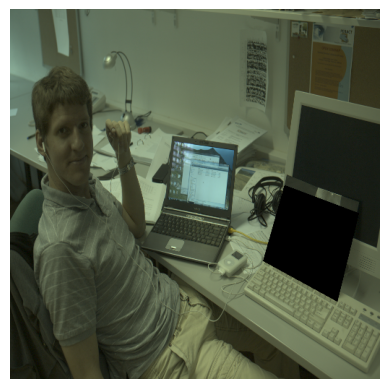

In [8]:
import torch
import matplotlib.pyplot as plt

img = sample.permute(1, 2, 0).numpy()

plt.imshow(img)
plt.axis("off")
plt.show()

In [9]:
class Gehler(pl.LightningDataModule):
    def __init__(self, cfg, phase, folds_num):
        super(Gehler, self).__init__()
        self.cfg = cfg
        self.phase = phase
        self.root_dir = "../data/gehler/"
        self.img_paths = [os.path.join(self.img_dir, img_name) for img_name in os.listdir(self.img_dir)]
        self.data = self._load_data()
        self.transform = self._get_transform()

        folds = scipy.io.loadmat('../data/gehler/folds.mat')
        img_idx = folds["tr_split" if phase == "train" else "te_split"][0][folds_num][0]
        meta_path = '../data/gehler/metadata.txt'
        metadata = open(meta_path, 'r').readlines()

        self.fold_data = [metadata[i - 1] for i in img_idx] # metadata only with the fold
    
    def __len__(self):
        return len(self.img_paths)

    # Return: img, illum, img name
    def __getitem__(self, idx):
        img_name = self.fold_data[idx].strip().split(' ')[1]
        img = 

        img = Image.open(img_name).convert("RGB")

        if self.transform is None:
            return img
        else:
            return self.transform(img)
        

    # list of indices of fold
    def _load_folds(self):
        folds_fn = os.path.join(self.root_dir, 'folds.mat')
        folds = scipy.io.loadmat(folds_fn)
        return folds["tr_split" if self.phase == "train" else "te_split"][0]







SyntaxError: invalid syntax (2912786798.py, line 24)

In [3]:
root_dir = "../data/gehler/"

In [4]:
meta_data_fn = os.path.join(root_dir, 'meta.pkl')
with open(meta_data_fn, 'rb') as f:
    meta_data = pickle.load(f)
    print(meta_data)


AttributeError: Can't get attribute 'ImageRecord' on <module '__main__'>

In [ ]:
meta_data_fn = os.path.join(self.root_dir, f'{self.camera_name}-meta.pkl')
        with open(meta_data_fn, 'rb') as f:
            meta_data = pickle.load(f)
        if self.data_fragment != -1:
            meta_data = meta_data[:self.data_fragment]
        return meta_data

In [ ]:
        with open(self.get_directory() + 'coordinates/' + fn.split('.')[0] + '_macbeth.txt', 'r') as f:
            lines = f.readlines()
            width, height = map(float, lines[0].split())
            scale_x = 1 / width
            scale_y = 1 / height
            lines = [lines[1], lines[2], lines[4], lines[3]]
            polygon = []
            for line in lines:
                line = line.strip().split()
                x, y = (scale_x * float(line[0])), (scale_y * float(line[1]))
                polygon.append((x, y))
            return np.array(polygon, dtype='float32')

In [5]:
fn = 'IMG_0369.png'
root_dir = "../data/gehler/"

lines = open(root_dir + 'coordinates/' + fn.split('.')[0] + '_macbeth.txt', 'r').readlines()
width, height = map(float, lines[0].split())
scale_x, scale_y = 1 / width, 1 / height
polygon = []
for line in [lines[1], lines[2], lines[4], lines[3]]:
    line = line.strip().split()
    x, y = (scale_x * float(line[0])), (scale_y * float(line[1]))
    polygon.append((x, y))
np.array(polygon, dtype='float32')

array([[0.13326658, 0.68135923],
       [0.20385855, 0.65646625],
       [0.22522634, 0.724357  ],
       [0.15376641, 0.7590068 ]], dtype=float32)

In [6]:
import cv2

root_dir = "../data/gehler/"



def get_mcc_coord(fn: str) -> np.ndarray:
    """
    Func : computes the relative MCC coordinates for the given image
    Args: file name ex) 'IMG_0369.png'
    Return: relative MCC coordinates
    """
    lines = open(root_dir + 'coordinates/' + fn.split('.')[0] + '_macbeth.txt', 'r').realines()




def load_image(fn: str) -> np.ndarray:
    """
    Func : load image with color checker
    Args: file name ex) 'IMG_0369.png'
    Return: array of RAW image
    """
    file_path = "../data/gehler/" + '/images/' + fn
    raw = np.array(cv2.imread(file_path, cv2.IMREAD_UNCHANGED), dtype='float32') # RAW image
    # Handle pictures taken with Canon 5d Mark III
    black_point = 129 if fn.startswith('IMG') else 1
    # Keep only the pixels such that raw - black_point > 0
    raw = np.maximum(raw - black_point, [0, 0, 0])
    return raw

def load_image_without_mcc(fn : str, mc_coord: np.ndarray) -> np.ndarray:
    """
    Func : load image without color checker (masking with a black polygon)
    Args: file name ex) 'IMG_0369.png' / mask coordinates
    Return: array of RAW image with mask
    """
    raw = load_image(fn)
    # Clip values between 0 and 1
    img = (np.clip(raw / raw.max(), 0, 1) * 65535.0).astype(np.uint16)
    # Get vertices for polygon mask
    polygon = r.mcc_coord * np.array([img.shape[1], img.shape[0]])
    polygon = polygon.astype(np.int32)
    # Fill the polygon to image
    cv2.fillPoly(img, pts=[polygon], color=(BOARD_FILL_COLOR,) * 3)




In [7]:
raw = load_image('IMG_0369.png')
img = (np.clip(raw / raw.max(), 0, 1) * 65535.0).astype(np.uint16)
np.array([img.shape[1], img.shape[0]])

array([2193, 1460])

In [34]:
raw = load_image('IMG_0369.png')

In [37]:
raw.shape

(1460, 2193, 3)

In [36]:
import cv2

cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [ ]:
def linear_to_nonlinear(img: Union[np.array, Image, Tensor]) -> Union[np.array, Image, Tensor]:
    if isinstance(img, np.ndarray):
        return np.power(img, (1.0 / 2.2))
    if isinstance(img, Tensor):
        return torch.pow(img, 1.0 / 2.2)
    return F.to_pil_image(torch.pow(F.to_tensor(img), 1.0 / 2.2).squeeze(), mode="RGB")

In [69]:
def _load_metadata(folds_num):
        folds_fn = os.path.join('../data/gehler/', 'folds.mat')
        folds = scipy.io.loadmat(folds_fn)
        img_idx = folds["tr_split"][0] # Indices of image folds
        meta_path = '../data/gehler/metadata.txt'
        metadata = open(meta_path, 'r').readlines()
        return [metadata[i - 1] for i in img_idx]

In [81]:
img_idx = folds["tr_split"][0][1]
img_idx

array([[  1,   3,   5,   6,   7,   8,   9,  11,  12,  15,  16,  18,  19,
         20,  22,  23,  26,  27,  29,  32,  33,  36,  37,  39,  41,  43,
         45,  48,  50,  54,  55,  56,  57,  59,  60,  62,  63,  65,  66,
         67,  68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,
         82,  83,  88,  89,  90,  91,  93,  95,  96,  97,  99, 101, 103,
        104, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 122, 123,
        124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 140,
        141, 143, 144, 146, 147, 148, 152, 154, 155, 156, 157, 159, 161,
        162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175,
        178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 192,
        193, 194, 195, 196, 198, 199, 203, 204, 207, 208, 210, 211, 212,
        214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 229,
        230, 232, 234, 238, 239, 240, 241, 242, 244, 245, 248, 249, 250,
        252, 253, 255, 257, 260, 261, 263, 265, 266

In [3]:
folds_num = 1
folds_fn = os.path.join('../data/gehler/', 'folds.mat')
folds = scipy.io.loadmat(folds_fn)
img_idx = folds["tr_split"][0][folds_num][0]
meta_path = '../data/gehler/metadata.txt'
metadata = open(meta_path, 'r').readlines()
data = [metadata[i - 1] for i in img_idx]
idx = 1
_, fn, r, g , b = data[idx].strip().split(' ')
print(fn, r, g, b)





8D5U5526.png 0.604153 0.735266 0.307218
